In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('perrin-freres-monthly-champagne-.csv',date_parser=[1])

In [3]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [4]:
df.columns=['Month','Sales']

In [5]:
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [6]:
df.isnull().sum()

Month    1
Sales    2
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

Month    0
Sales    0
dtype: int64

In [9]:
df.dtypes

Month     object
Sales    float64
dtype: object

In [10]:
df['Month'] = pd.to_datetime(df['Month'])

In [11]:
df.dtypes

Month    datetime64[ns]
Sales           float64
dtype: object

In [12]:
df

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0
...,...,...
100,1972-05-01,4618.0
101,1972-06-01,5312.0
102,1972-07-01,4298.0
103,1972-08-01,1413.0


In [13]:
df.set_index('Month')

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0
...,...
1972-05-01,4618.0
1972-06-01,5312.0
1972-07-01,4298.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Month   105 non-null    datetime64[ns]
 1   Sales   105 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.5 KB


In [15]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


<AxesSubplot:>

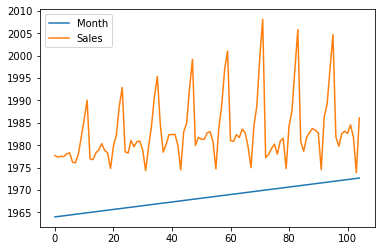

In [16]:
df.plot()

In [17]:
# Checking that the data is stationary or not

In [18]:
from statsmodels.tsa.stattools import adfuller

In [19]:
adfuller(df['Sales'],)

(-1.8335930563276246,
 0.3639157716602442,
 11,
 93,
 {'1%': -3.502704609582561,
  '5%': -2.8931578098779522,
  '10%': -2.583636712914788},
 1478.4633060594724)

In [20]:
def adfuller_test(sales):
    result=adfuller(sales)
    
    labels=['ADF Test Statistics','P-value','Lages Used','Number of obs used']
    for value,label in zip(result,labels):
        print('{}:{}'.format(label,value))
    if result[1]<=0.05:
        print("Strong evidence against null hypo,data is stationary")
    else:
        print("Weak evidence against null hypo,data is not stationary")

In [21]:
adfuller_test(df['Sales'])

ADF Test Statistics:-1.8335930563276246
P-value:0.3639157716602442
Lages Used:11
Number of obs used:93
Weak evidence against null hypo,data is not stationary
